In [63]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import f_oneway



pd.set_option('display.max_rows', None)

In [64]:
%store -r open_communication

%store -r hospitals_personalInfo

In [65]:
#parameter_1
my_parameter = open_communication

In [66]:
# Relative frequences for answers of every question

relative_frequencies = my_parameter.apply(lambda x: x.value_counts(normalize=True))
relative_frequencies

,4. Το προσωπικό μπορεί ελεύθερα να αμφισβητήσει τις αποφάσεις ή τις ενέργειες των ανωτέρων του.,2. Το προσωπικό μιλάει ελεύθερα όταν διαπιστώσει κάτι που επιδρά αρνητικά στη φροντίδα υγείας του ασθενούς.,"6. Το προσωπικό φοβάται να ρωτήσει, όταν κάτι δεν φαίνεται σωστό."
1.0,0.140496,0.037190,0.033058
2.0,0.297521,0.082645,0.152893
3.0,0.305785,0.198347,0.231405
4.0,0.181818,0.392562,0.289256
5.0,0.074380,0.289256,0.293388


/var/folders/q9/jvtr2p8s6sn6wt933mh1tyfm0000gn/T/ipykernel_48409/2184165003.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


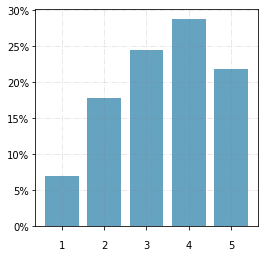

In [67]:
relative_frequencies_sum = relative_frequencies.sum(axis=1)/3
height = relative_frequencies_sum

bars = ('1', '2', '3', '4', '5')


# Figure Size
fig, ax= plt.subplots(figsize =(4, 4))


# Horizontal Bar Plot
ax.bar(bars, height,color=(0.0, 0.4, 0.6, 0.6))
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.9,
        alpha = 0.2)

    # Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 2)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.savefig('distribution.png')

plt.show()

In [68]:
height

1.0    0.070248
2.0    0.177686
3.0    0.245179
4.0    0.287879
5.0    0.219008
dtype: float64

In [69]:
my_parameter.describe()

,4. Το προσωπικό μπορεί ελεύθερα να αμφισβητήσει τις αποφάσεις ή τις ενέργειες των ανωτέρων του.,2. Το προσωπικό μιλάει ελεύθερα όταν διαπιστώσει κάτι που επιδρά αρνητικά στη φροντίδα υγείας του ασθενούς.,"6. Το προσωπικό φοβάται να ρωτήσει, όταν κάτι δεν φαίνεται σωστό."
count,242.000000,242.000000,242.000000
mean,2.752066,3.814050,3.657025
std,1.132551,1.059696,1.149658
min,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000
50%,3.000000,4.000000,4.000000
75%,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


# Correlation Analysis

In [70]:
# individual score to parameter 

parameter = my_parameter

individualScore = parameter.sum(axis=1)/3


In [71]:
individualScore.describe()

count    244.000000
mean       3.379781
std        0.917059
min        0.000000
25%        2.666667
50%        3.333333
75%        4.000000
max        5.000000
dtype: float64

### Gender correlation

In [72]:
gender = hospitals_personalInfo['1. Φύλο: ']

In [73]:
# create a frame with gender and score
gender = pd.concat([gender,individualScore],axis=1)

gender = gender.dropna()

gender.columns = ['Gender','Score']

male = []
female = []


#create table for every category
for index, row in gender.iterrows(): 
    if row['Gender'] == 'Γυναίκα':
        female.append(row['Score'])
    else:
        male.append(row['Score'])
        

In [74]:
from statistics import mean, pvariance
avg1 = mean(male)
var1 = pvariance(male)
avg2 = mean(female)
var2 = pvariance(female)

print("avg male =", avg1,"var male =",var1,"avg female =", avg2,"var female =",var2 )

avg male = 3.1173708920187795 var male = 0.7233132755846503 avg female = 3.52465483234714 var female = 0.7017261300374636


In [75]:
tStat, pValue = stats.ttest_ind(female, male, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the

P-Value:0.0009551985596903161 T-Statistic:3.3811447085610924


In [76]:
#create table for every category

# for index, row in gender.iterrows(): 
#     if row['Gender'] == 'Γυναίκα':
#         gender["Gender"].loc[index] = 0
#     elif row['Gender'] == 'Άνδρας':
#         gender["Gender"].loc[index] = 1

    

### Age Correlation

In [77]:
age = hospitals_personalInfo['2. Ηλικία…']

In [78]:
# create a frame with age and score
age = pd.concat([age,individualScore],axis=1)
age.columns = ['Age','Score']
age = age.dropna()

In [79]:
# remove outliers
q = age['Age'].quantile(0.99)
age = age[age['Age'] < q]

In [80]:

x = age['Age']
y = age['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))



(corr,p-val) = (0.09308787306832242, 0.15939393536372984)


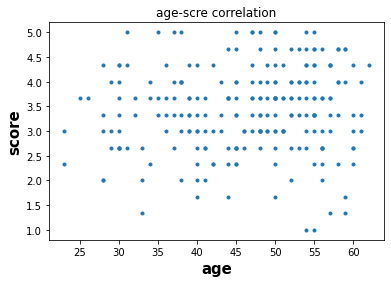

In [81]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Proffesion correlation

In [82]:
profession = hospitals_personalInfo['10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;']

profession= pd.concat([profession,individualScore],axis=1)

profession.columns = ['Profession','Score']

profession = profession.dropna()

In [83]:
print("Mean")
profession.groupby('Profession')['Score'].mean()

Mean


Profession
1. Ειδικευόμενος ιατρός    3.098765
2. Ειδικός ιατρός          3.122807
3. ΠΕ Νοσηλευτής           3.411765
4. ΤΕ Νοσηλευτής           3.544776
5. ΔΕ Βοηθός Νοσηλευτή     3.666667
Name: Score, dtype: float64

In [84]:
print("Variance")
profession.groupby('Profession')['Score'].var()

Variance


Profession
1. Ειδικευόμενος ιατρός    0.665084
2. Ειδικός ιατρός          0.705232
3. ΠΕ Νοσηλευτής           0.535131
4. ΤΕ Νοσηλευτής           0.722709
5. ΔΕ Βοηθός Νοσηλευτή     0.819444
Name: Score, dtype: float64

In [85]:
eidikevomenos_iatros = []
eidikos_iatros = []
pe_nosileftis = []
te_nosileftis = []
de_voithos_nosilefti = []

#create table for every category of profession
for index, row in profession.iterrows(): 
    if row['Profession'] == '1. Ειδικευόμενος ιατρός':
        eidikevomenos_iatros.append(row['Score'])
    elif row['Profession'] == '2. Ειδικός ιατρός':
        eidikos_iatros.append(row['Score'])
    elif row['Profession'] == '3. ΠΕ Νοσηλευτής':
        pe_nosileftis.append(row['Score'])
    elif row['Profession'] == '4. ΤΕ Νοσηλευτής':
        te_nosileftis.append(row['Score'])
    else:
        de_voithos_nosilefti.append(row['Score'])
        


In [86]:
f_oneway(eidikevomenos_iatros, eidikos_iatros, pe_nosileftis,te_nosileftis,de_voithos_nosilefti)

F_onewayResult(statistic=3.275252005107076, pvalue=0.012327865349798937)

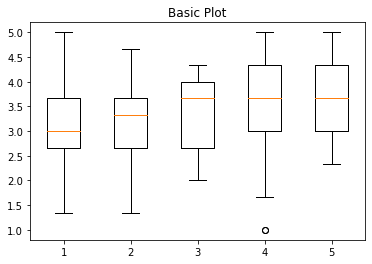

In [87]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([eidikevomenos_iatros,eidikos_iatros,pe_nosileftis,te_nosileftis,de_voithos_nosilefti])

plt.show()



### Education Correlation

In [88]:
education = hospitals_personalInfo['3α. Ποια είναι η βασική σας εκπαίδευση;']

education= pd.concat([education,individualScore],axis=1)

education.columns = ['Education','Score']

education = education.dropna()

In [89]:
print("Mean")
education.groupby('Education')['Score'].mean()

Mean


Education
1. Δευτεροβάθμια (Δ.Ε.)     3.844444
2. Τεχνολογική (Τ.Ε.)       3.525180
3. Πανεπιστημιακή (Π.Ε.)    3.140562
Name: Score, dtype: float64

In [90]:
print("Variance")
education.groupby('Education')['Score'].var()

Variance


Education
1. Δευτεροβάθμια (Δ.Ε.)     0.648677
2. Τεχνολογική (Τ.Ε.)       0.708500
3. Πανεπιστημιακή (Π.Ε.)    0.718484
Name: Score, dtype: float64

In [91]:
defterovathmia = []
texnologiki = []
panepistimiaki = []


#create table for every category of profession
for index, row in education.iterrows(): 
    if row['Education'] == '1. Δευτεροβάθμια (Δ.Ε.)':
        defterovathmia.append(row['Score'])
    elif row['Education'] == '2. Τεχνολογική (Τ.Ε.)':
        texnologiki.append(row['Score'])
    elif row['Education'] == '3. Πανεπιστημιακή (Π.Ε.)':
        panepistimiaki.append(row['Score'])

        

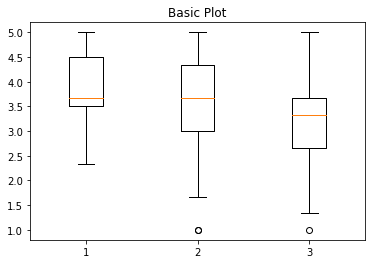

In [92]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([defterovathmia,texnologiki,panepistimiaki])

plt.show()

In [93]:
f_oneway(defterovathmia,texnologiki,panepistimiaki)

F_onewayResult(statistic=7.552428472518997, pvalue=0.0006630380696734581)

### Adverse Event

In [94]:
aevent = hospitals_personalInfo['Τους τελευταίους 12 μήνες πόσα δυσμενή συμβάντα έχετε αναφέρει; (Αναφέρετε έναν αριθμό)']

In [95]:
# create a frame with age and score
aevent = pd.concat([aevent,individualScore],axis=1)
aevent.columns = ['aevent','Score']
aevent = aevent.dropna()

In [96]:
# remove outliers
q = aevent['aevent'].quantile(0.99)
aevent = aevent[aevent['aevent'] < q]

In [97]:

x = aevent['aevent']
y = aevent['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))


(corr,p-val) = (-0.10372533920661534, 0.1418244414990625)


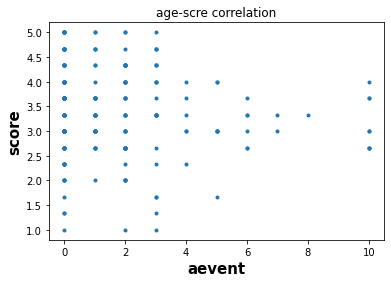

In [98]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("aevent",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Years of work in the team

In [99]:
wyears = hospitals_personalInfo['8. Πόσο χρονικό διάστημα εργάζεστε στη συγκεκριμένη μονάδα ?']

In [100]:
# create a frame with years and score
wyears = pd.concat([wyears,individualScore],axis=1)
wyears.columns = ['wyears','Score']
wyears = wyears.dropna()



In [101]:
# remove outlie
q = wyears['wyears'].quantile(0.99)
wyears = wyears[wyears['wyears'] < q]

In [102]:
x = wyears['wyears']
y = wyears['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))

(corr,p-val) = (0.02093712282609737, 0.7553147614248215)


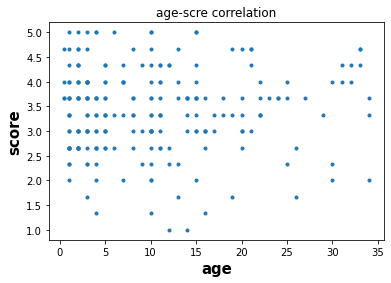

In [103]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Years of work in the hospital


In [104]:
wyears = hospitals_personalInfo['7. Πόσο χρονικό διάστημα εργάζεστε στο συγκεκριμένο Νοσοκομείο;']

In [105]:
# create a frame with years and score
wyears = pd.concat([wyears,individualScore],axis=1)
wyears.columns = ['wyears','Score']
wyears = wyears.dropna()



In [106]:
# remove outliers
q = wyears['wyears'].quantile(0.99)
wyears = wyears[wyears['wyears'] < q]

In [107]:
x = wyears['wyears']
y = wyears['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))

(corr,p-val) = (0.17625762009115398, 0.00711788956662204)


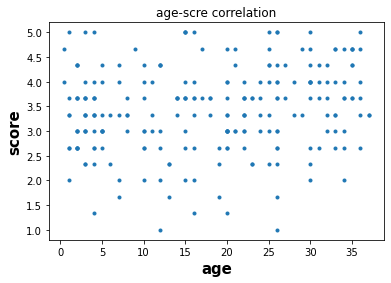

In [108]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

In [113]:
whours = hospitals_personalInfo['9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …']

In [114]:
# create a frame with hours and score
whours = pd.concat([whours,individualScore],axis=1)
whours.columns = ['whours','Score']
whours = whours.dropna()


In [115]:
# remove outliers
q = whours['whours'].quantile(0.99)
whours = whours[whours['whours'] < q]

In [116]:
x = whours['whours']
y = whours['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))

(corr,p-val) = (-0.10292797081776763, 0.12202856291900466)


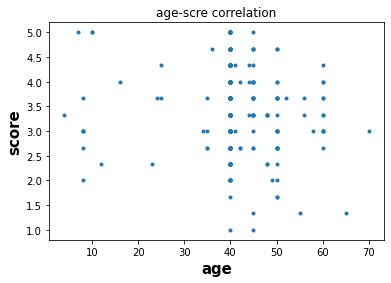

In [117]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

## Multivariant linear Regression for score and variables with evidece of correlation

In [ ]:
hospitals_personalInfo

In [ ]:
data = hospitals_personalInfo[['1. Φύλο: ','2. Ηλικία…','Τους τελευταίους 12 μήνες πόσα δυσμενή συμβάντα έχετε αναφέρει; (Αναφέρετε έναν αριθμό)','7. Πόσο χρονικό διάστημα εργάζεστε στο συγκεκριμένο Νοσοκομείο;','10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;','9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …']]
data = pd.concat((data, individualScore), axis=1)
data.columns = ['gender','age','aevent','yearsHospital','position','hours','score']


In [ ]:
#clean data
data = data.dropna()
data

In [ ]:
#remove outliers
q1 = data['aevent'].quantile(0.99)
data = data.loc[data['aevent'] < q1]

q2 = data['yearsHospital'].quantile(0.99)
data = data.loc[data['yearsHospital'] < q2]

q3 = data['hours'].quantile(0.99)
data = data.loc[data['hours'] < q2]

print(q3)

In [ ]:
#make categorical values binary

dummies = pd.get_dummies(data['gender'])
data = pd.concat((data, dummies), axis=1)

dummies = pd.get_dummies(data['position'])
data = pd.concat((data, dummies), axis=1)


In [ ]:
data

In [ ]:
# build model
X = data[['age','Άνδρας','aevent','1. Ειδικευόμενος ιατρός','hours']]
y = data['score']

In [ ]:
#ols model
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())